In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from PIL import Image

- La notebook debe analizar cada universidad del grupo
- Trabajar creando gráficos que expliquen las siguientes dimensiones:
  * Carrera
  * Edad
  * Género
  * Localidad
- Realizar un comparativo de inscripciones entre ambas universidades.
- Analizar correlaciones de variables, entre:
  * Carrera
  * Edad
  * Género
  * Localidad
- Presentar una conclusión final de lo analizado.

In [2]:
df_lp = pd.read_csv("GE_LaPampa_process.txt", sep='\t')
df_in = pd.read_csv("GE_Interamericana_process.txt", sep='\t')

In [3]:
df_total = pd.concat([df_lp, df_in])

**UNIVERSIDAD DE LA PAMPA**

PARTE 1:

Trabajar creando gráficos que expliquen las siguientes dimensiones:

Carrera

Edad

Género

Localidad

Text(0.5, 1.0, 'Numero de estudiantes por carrera y género\nuniversidad nacional de la pampa')

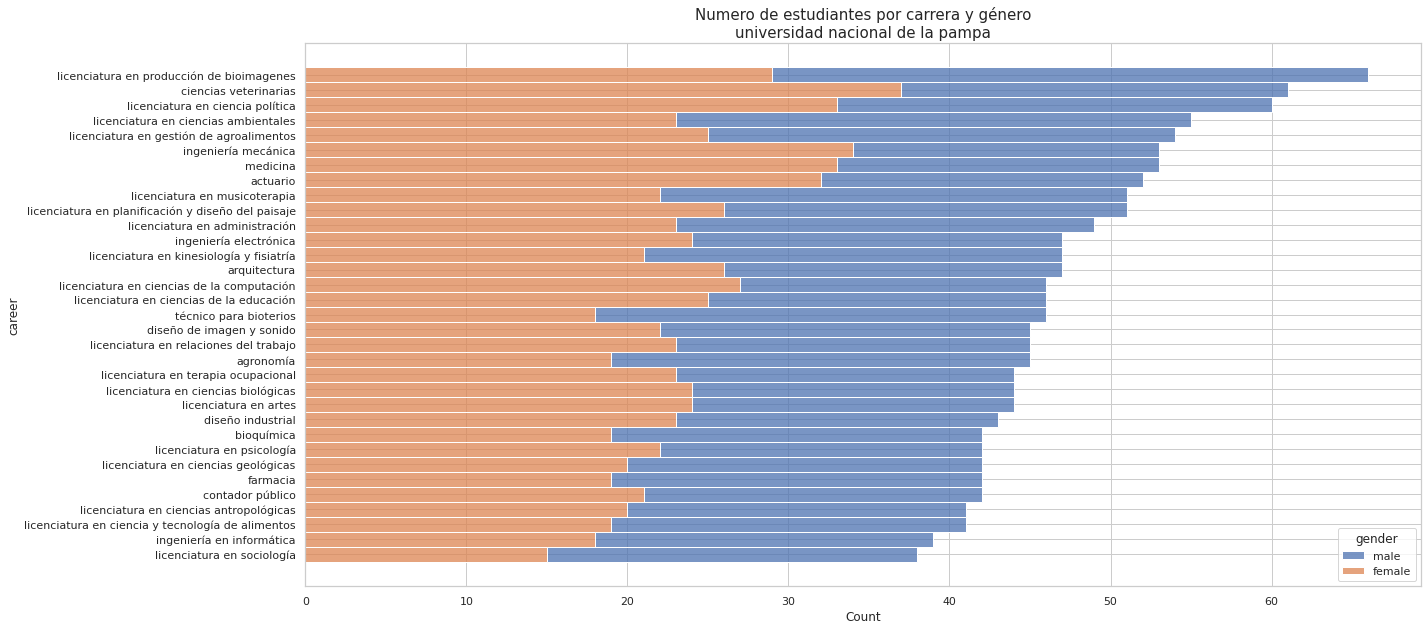

In [4]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
#sns.set_color_codes("pastel")
#sns.despine(left=True, bottom=True)

#elijo dataframe
stats = df_lp

stats['cont_carrera'] = stats.groupby('career', sort=False)['career'].transform('count')
stats = stats.sort_values('cont_carrera', ascending=False)
p1_lp = sns.histplot(data=stats, y="career", hue="gender", multiple="stack")
p1_lp.set_title('Numero de estudiantes por carrera y género\n'+stats['university'][0], fontsize=15)
#ax.set_ylim(0,10)
#ax.set_xticklabels('Universidad de La Pampa')

In [5]:
stats['university'][0]


'universidad nacional de la pampa'

Text(0.5, 1.0, 'Numero de estudiantes por carrera y género\nuniversidad nacional de la pampa')

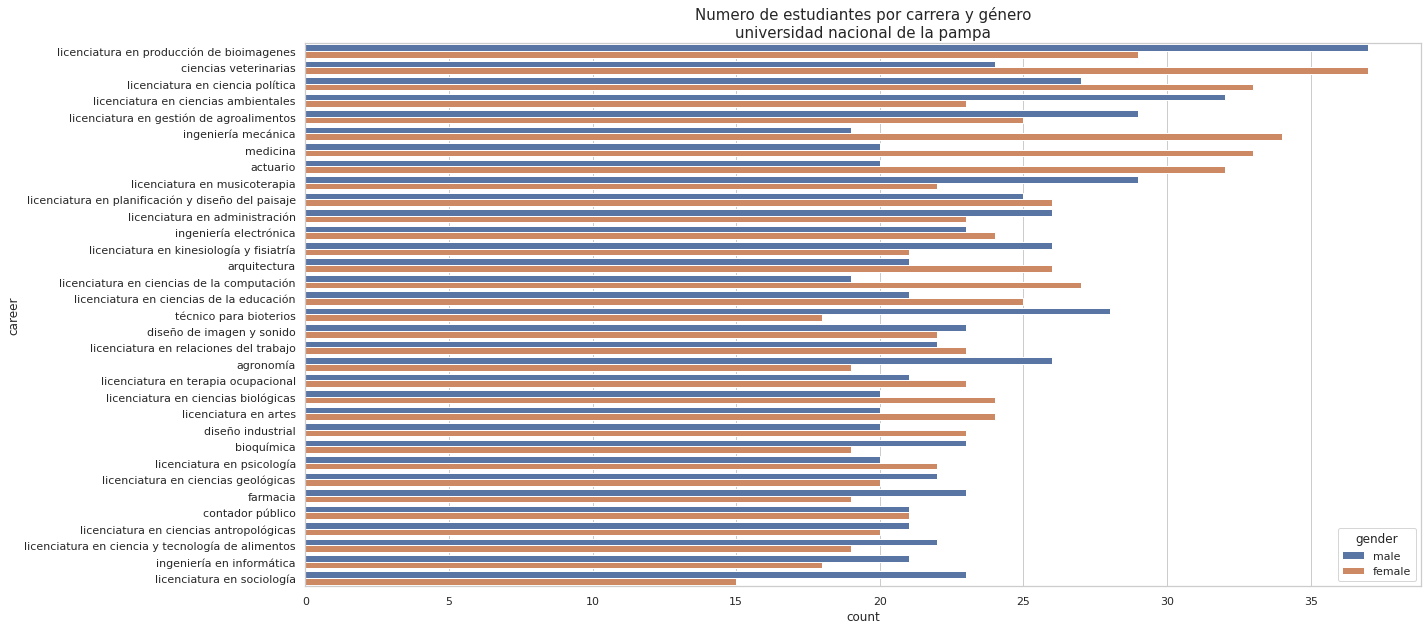

In [6]:
plt.figure(figsize=(20,10))
p2_lp = sns.countplot(data=stats, y="career", hue="gender")
p2_lp.set_title('Numero de estudiantes por carrera y género\n'+stats['university'][0], fontsize=15)

Text(0.5, 1.0, 'Distribución por edades en la carrera\nlicenciatura en administración')

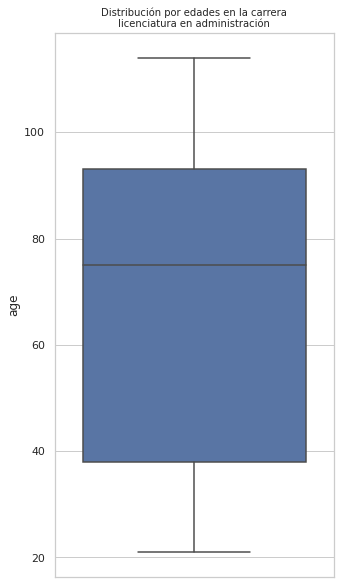

In [7]:
plt.figure(figsize=(5,10))
carreras = stats['career'].unique()
nro_carreras = carreras.size
# para elegir la carrera se eligue un indice entre 0 y (nro_carreras-1)
index = 10
stats_2 = stats[stats['career'] == carreras[index]]

p3_lp = sns.boxplot(data=stats_2, y="age")
p3_lp.set_title('Distribución por edades en la carrera\n'+str(carreras[index]), fontsize=10)


Text(0.5, 1.0, 'Distribución de edad por carreras en la\nuniversidad nacional de la pampa')

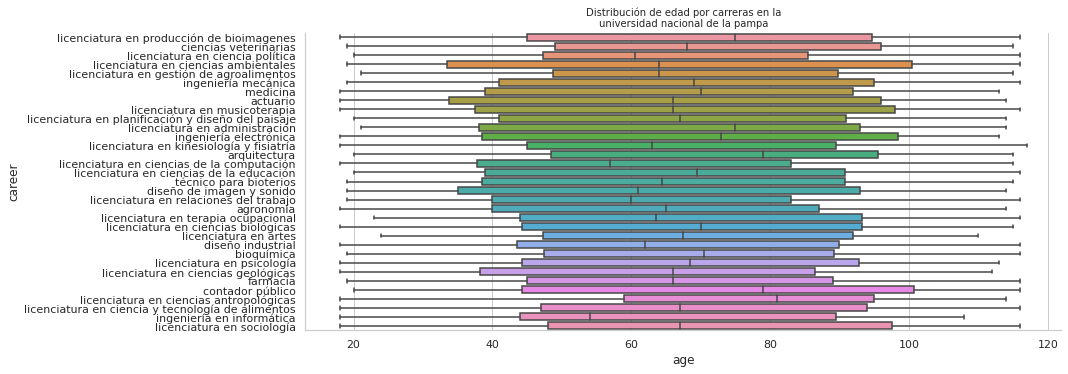

In [8]:
#plt.figure(figsize=(20,40))
p4_lp=sns.catplot(
    data=stats,
    x='age',
    y='career',
    #hue='gender',
    kind='box',
    height=5, # make the plot 5 units high
    aspect=3)
plt.title('Distribución de edad por carreras en la\n'+str(stats['university'][0]), fontsize=10)

Text(0.5, 1.0, 'Numero de estudiantes por localidad y género\nuniversidad nacional de la pampa')

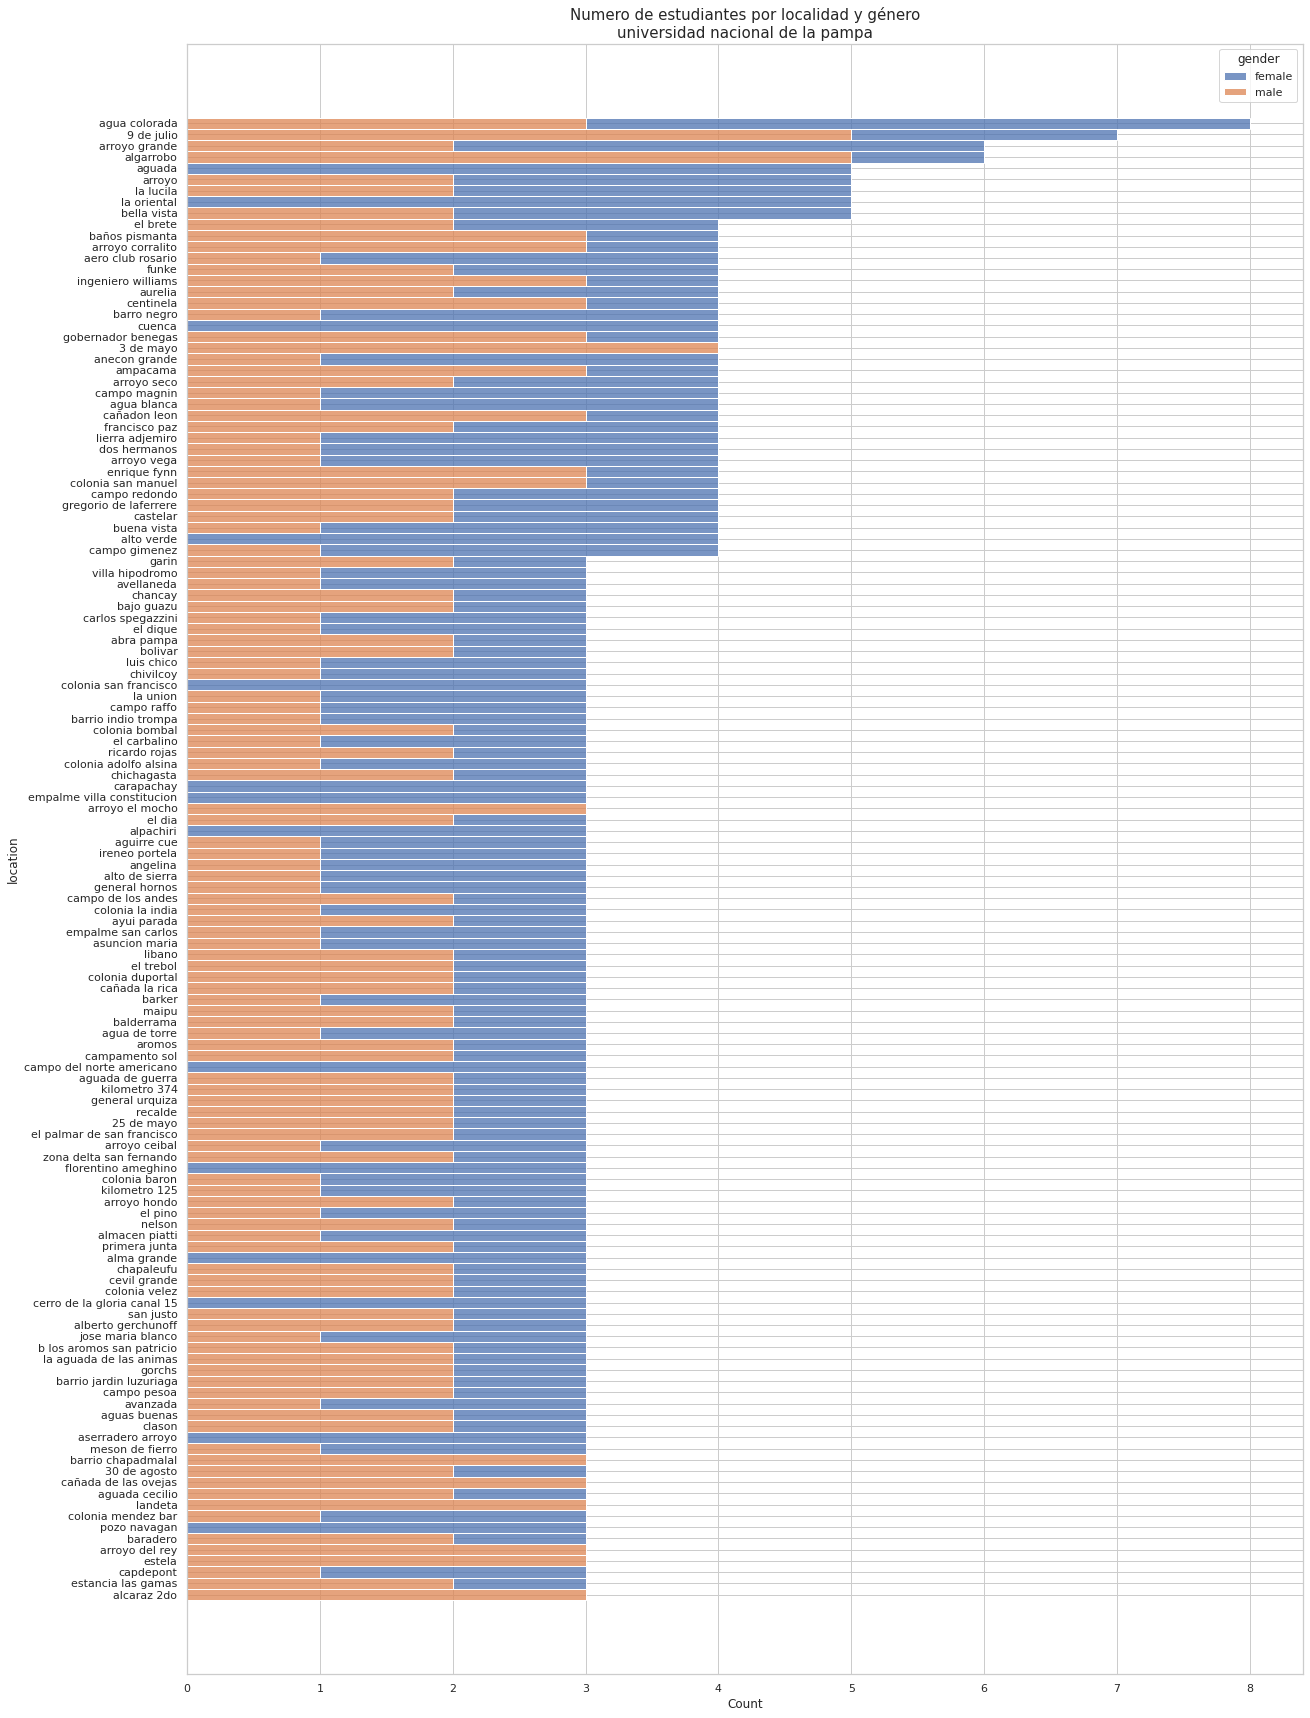

In [9]:
plt.figure(figsize=(20,30))
stats_3 = stats
stats_3['cont_loc'] = stats_3.groupby('location', sort=False)['location'].transform('count')
stats_3 = stats_3.sort_values('cont_loc', ascending=False)
# me quedo con el top 3 porque son muchas localidades
stats_3 = stats_3[stats_3['cont_loc'] >= 3]
p5_lp = sns.histplot(data=stats_3, y="location", hue="gender", multiple="stack")
p5_lp.set_title('Numero de estudiantes por localidad y género\n'+stats['university'][0], fontsize=15)


PARTE 2

Realizar un comparativo de inscripciones entre ambas universidades.

Text(0.5, 1.0, 'Numero de estudiantes por carrera y universidad')

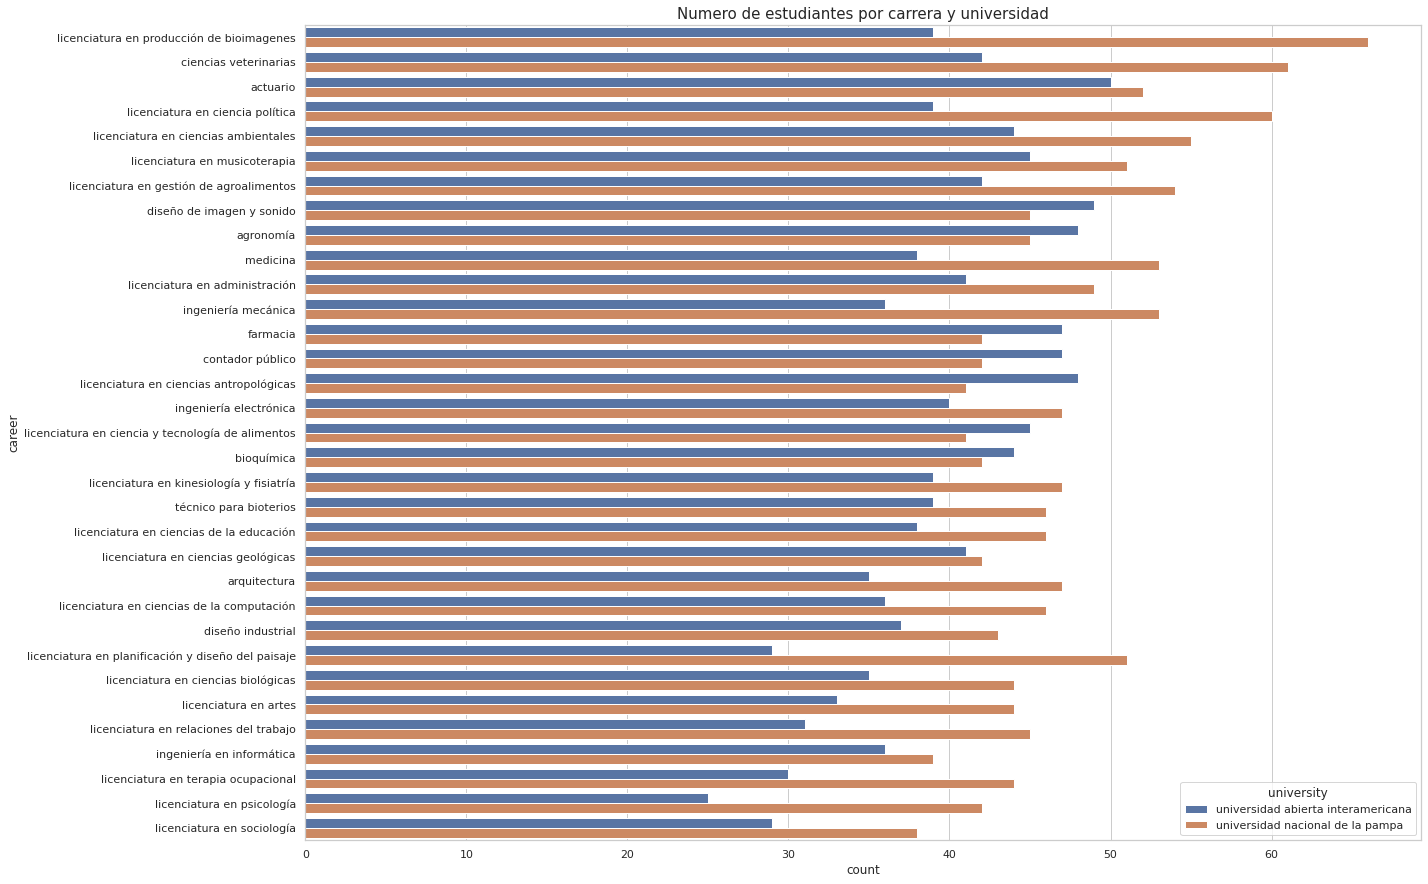

In [11]:
plt.figure(figsize=(20,15))
stats_5 = df_total
stats_5['cont_carrera'] = stats_5.groupby('career', sort=False)['career'].transform('count')
stats_5 = stats_5.sort_values('cont_carrera', ascending=False)
p7 = sns.countplot(data=stats_5, y="career", hue="university")
p7.set_title('Numero de estudiantes por carrera y universidad', fontsize=15)

Text(0.5, 1.0, 'Numero de inscripciones por año y universidad')

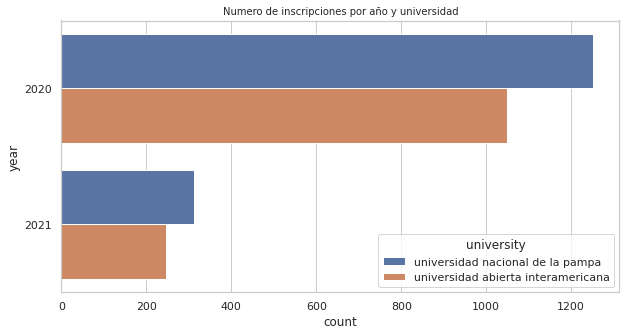

In [12]:
plt.figure(figsize=(10,5))
stats_6 = df_total
stats_6['inscription_date'] = pd.to_datetime(stats_6['inscription_date'])
stats_6['year'] = stats_6['inscription_date'].dt.year 
stats_6['cont_year'] = stats_6.groupby('year', sort=False)['year'].transform('count')
stats_6 = stats_6.sort_values('cont_year', ascending=False)
p8 = sns.countplot(data=stats_6, y="year", hue="university")
p8.set_title('Numero de inscripciones por año y universidad', fontsize=10)

PARTE 5

Analizar correlaciones de variables, entre:

Carrera

Edad

Género

Localidad

In [13]:
# me quedo solo con las columnas de interes
stats_7 = pd.DataFrame(stats, columns=['career', 'age', 'gender', 'location'])
# paso las variables a categoricas
stats_7['career']=stats_7['career'].astype('category').cat.codes
stats_7['gender']=stats_7['gender'].astype('category').cat.codes
stats_7['location']=stats_7['location'].astype('category').cat.codes

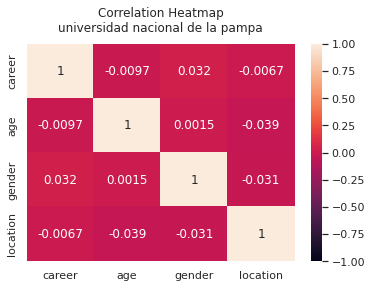

In [14]:
p9_lp = sns.heatmap(stats_7.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
p9_lp.set_title('Correlation Heatmap\n'+stats['university'][0], fontdict={'fontsize':12}, pad=12);

**UNIVERSIDAD ABIERTA INTERAMERICANA**

PARTE 1:

Trabajar creando gráficos que expliquen las siguientes dimensiones:

Carrera

Edad

Género

Localidad

Text(0.5, 1.0, 'Numero de estudiantes por carrera y género\nuniversidad abierta interamericana')

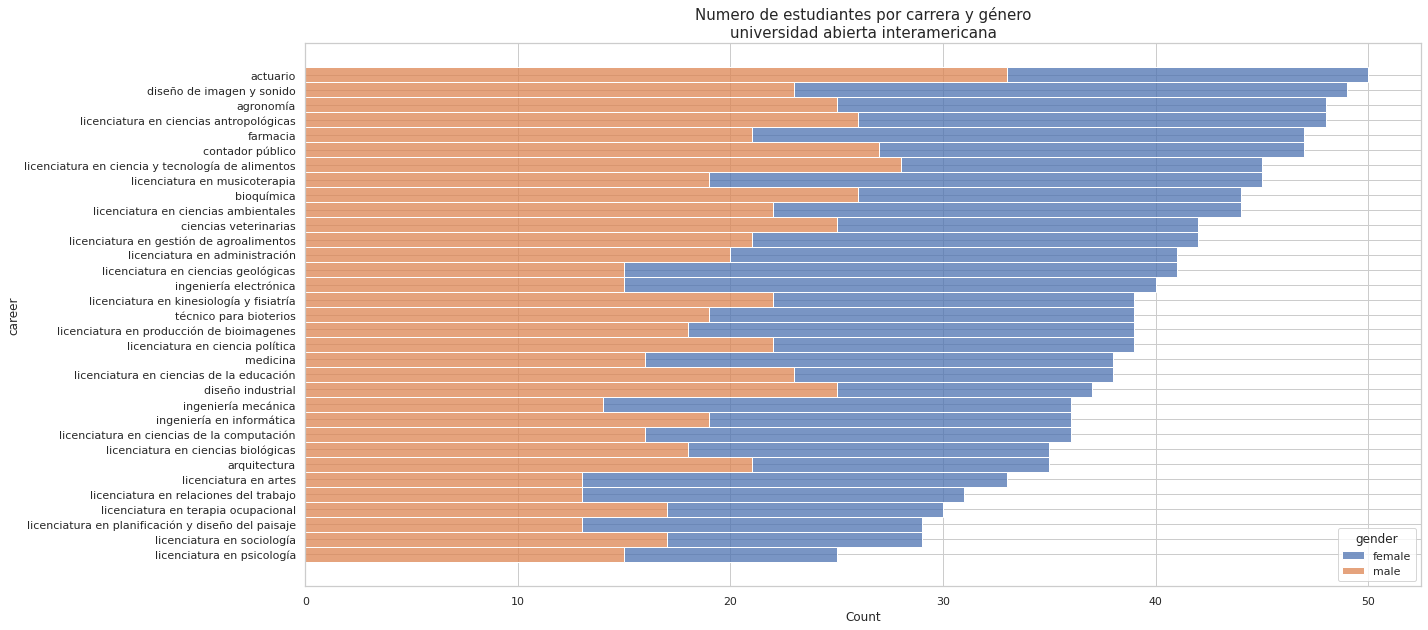

In [15]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
#sns.set_color_codes("pastel")
#sns.despine(left=True, bottom=True)

#elijo dataframe
stats = df_in

stats['cont_carrera'] = stats.groupby('career', sort=False)['career'].transform('count')
stats = stats.sort_values('cont_carrera', ascending=False)
p1_in = sns.histplot(data=stats, y="career", hue="gender", multiple="stack")
p1_in.set_title('Numero de estudiantes por carrera y género\n'+stats['university'][0], fontsize=15)
#ax.set_ylim(0,10)
#ax.set_xticklabels('Universidad de La Pampa')

Text(0.5, 1.0, 'Numero de estudiantes por carrera y género\nuniversidad abierta interamericana')

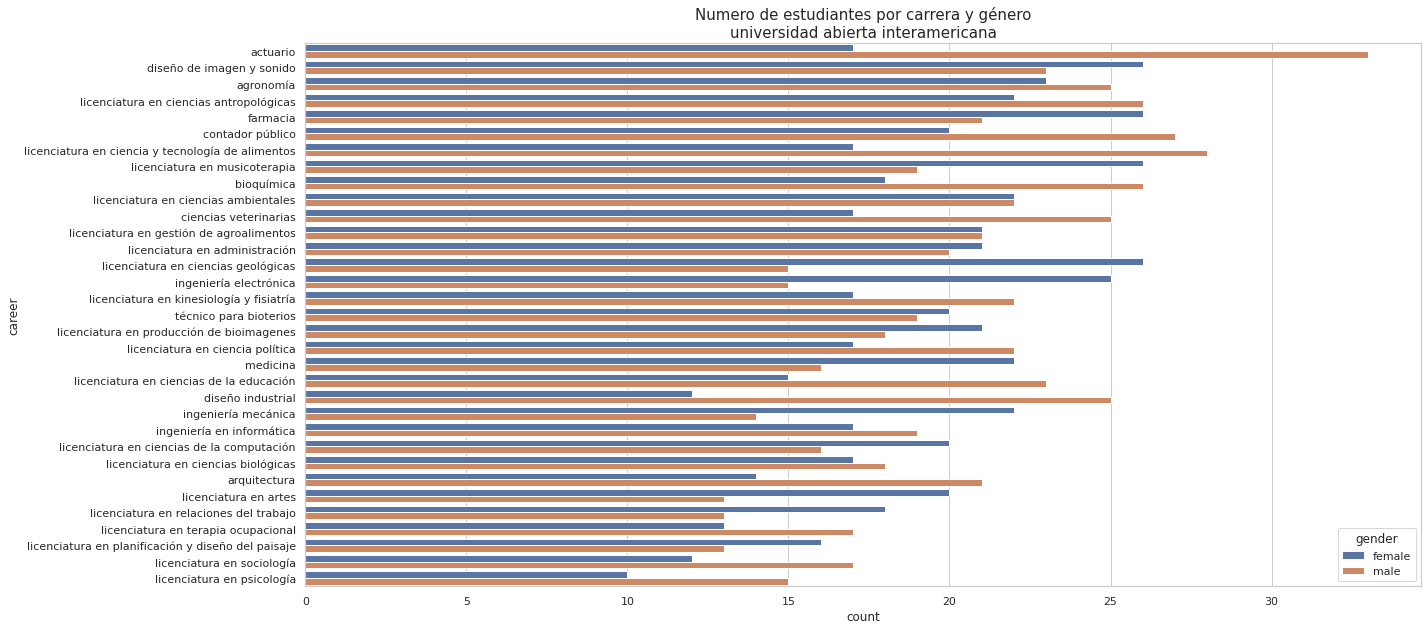

In [16]:
plt.figure(figsize=(20,10))
p2_in = sns.countplot(data=stats, y="career", hue="gender")
p2_in.set_title('Numero de estudiantes por carrera y género\n'+stats['university'][0], fontsize=15)

Text(0.5, 1.0, 'Distribución por edades en la carrera\nciencias veterinarias')

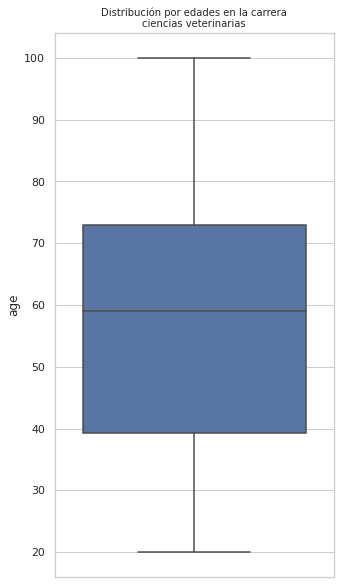

In [17]:
plt.figure(figsize=(5,10))
carreras = stats['career'].unique()
nro_carreras = carreras.size
# para elegir la carrera se eligue un indice entre 0 y (nro_carreras-1)
index = 10
stats_2 = stats[stats['career'] == carreras[index]]

p3_in = sns.boxplot(data=stats_2, y="age")
p3_in.set_title('Distribución por edades en la carrera\n'+str(carreras[index]), fontsize=10)


Text(0.5, 1.0, 'Distribución de edad por carreras en la\nuniversidad abierta interamericana')

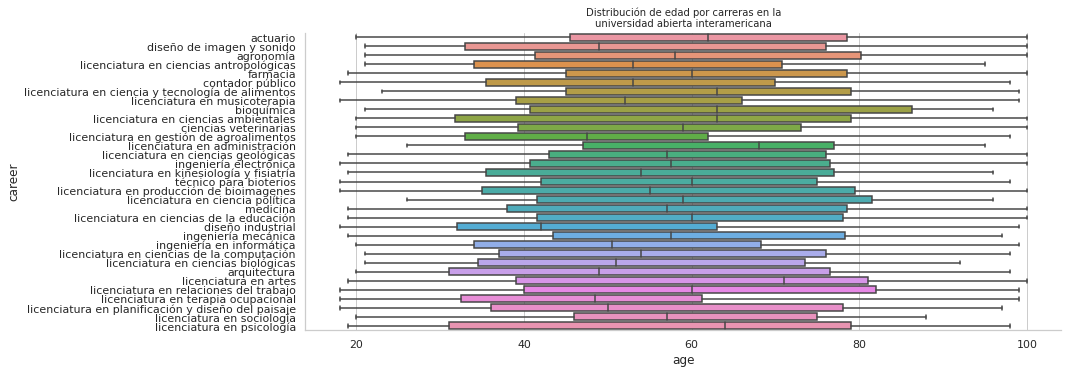

In [18]:
#plt.figure(figsize=(20,40))
p4_in=sns.catplot(
    data=stats,
    x='age',
    y='career',
    #hue='gender',
    kind='box',
    height=5, # make the plot 5 units high
    aspect=3)
plt.title('Distribución de edad por carreras en la\n'+str(stats['university'][0]), fontsize=10)

Text(0.5, 1.0, 'Numero de estudiantes por localidad y género\nuniversidad abierta interamericana')

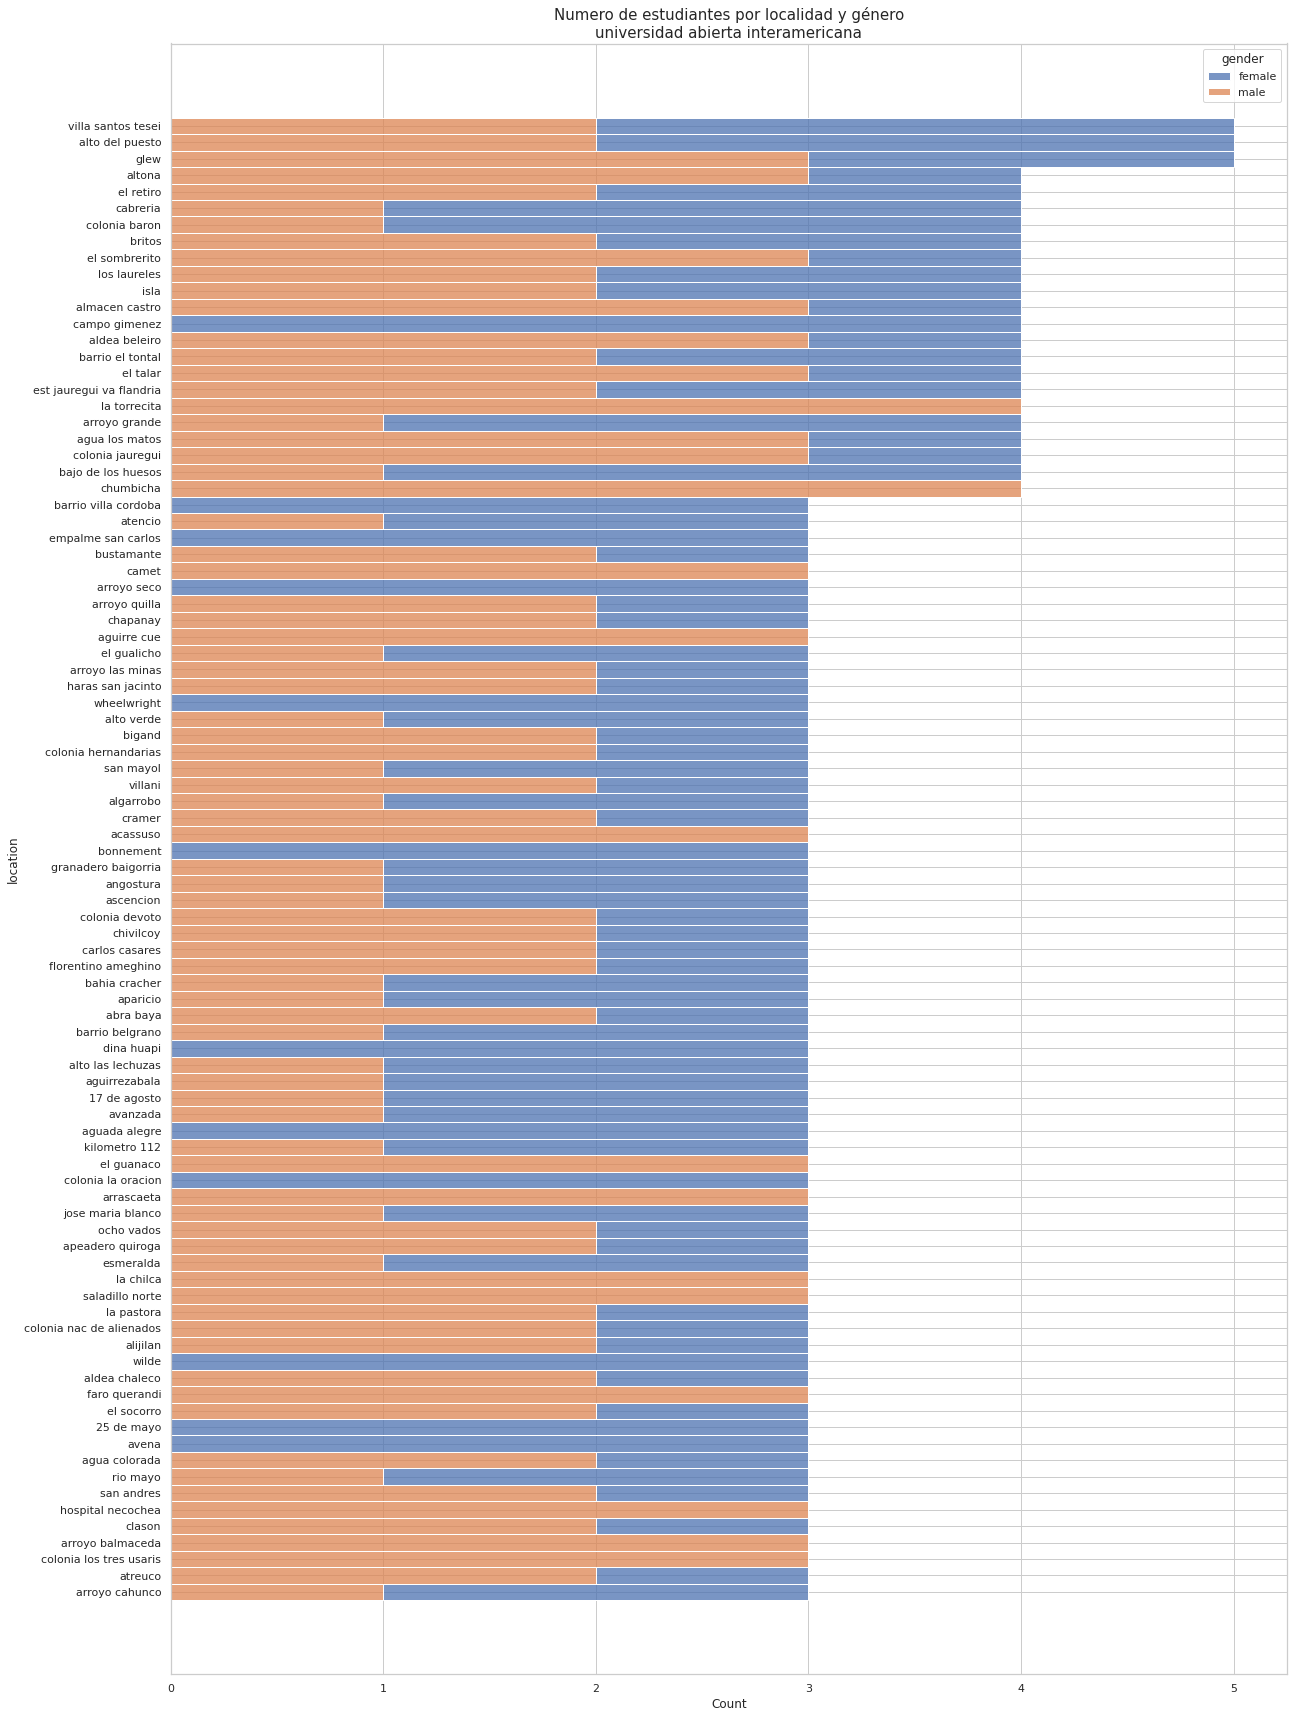

In [19]:
plt.figure(figsize=(20,30))
stats_3 = stats
stats_3['cont_loc'] = stats_3.groupby('location', sort=False)['location'].transform('count')
stats_3 = stats_3.sort_values('cont_loc', ascending=False)
# me quedo con el top 3 porque son muchas localidades
stats_3 = stats_3[stats_3['cont_loc'] >= 3]
p5_in = sns.histplot(data=stats_3, y="location", hue="gender", multiple="stack")
p5_in.set_title('Numero de estudiantes por localidad y género\n'+stats['university'][0], fontsize=15)


PARTE 5

Analizar correlaciones de variables, entre:

Carrera

Edad

Género

Localidad

In [21]:
# me quedo solo con las columnas de interes
stats_7 = pd.DataFrame(stats, columns=['career', 'age', 'gender', 'location'])
# paso las variables a categoricas
stats_7['career']=stats_7['career'].astype('category').cat.codes
stats_7['gender']=stats_7['gender'].astype('category').cat.codes
stats_7['location']=stats_7['location'].astype('category').cat.codes

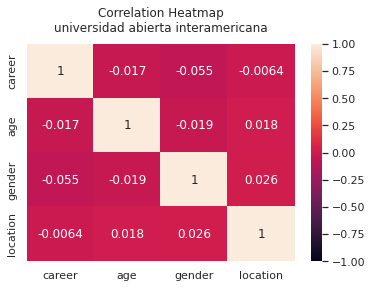

In [22]:
p9_in = sns.heatmap(stats_7.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
p9_in.set_title('Correlation Heatmap\n'+stats['university'][0], fontdict={'fontsize':12}, pad=12);

CONCLUSIONES

Se presenta un resumen de las gráficas obtenidas

In [76]:
# salvo graficas
p1_lp.figure.savefig('p1_lp.png')
p2_lp.figure.savefig('p2_lp.png')
p3_lp.figure.savefig('p3_lp.png')
p4_lp.figure.savefig('p4_lp.png')
p5_lp.figure.savefig('p5_lp.png')
p6_lp.figure.savefig('p6_lp.png')
p9_lp.figure.savefig('p9_lp.png')
p1_in.figure.savefig('p1_in.png')
p2_in.figure.savefig('p2_in.png')
p3_in.figure.savefig('p3_in.png')
p4_in.figure.savefig('p4_in.png')
p5_in.figure.savefig('p5_in.png')
p6_in.figure.savefig('p6_in.png')
p9_in.figure.savefig('p9_in.png')
p7.figure.savefig('p7.png')
p7.figure.savefig('p7.png')

Text(0.5, 1.0, 'Cantidad de estudiantes por carrera (U. La Pampa)')

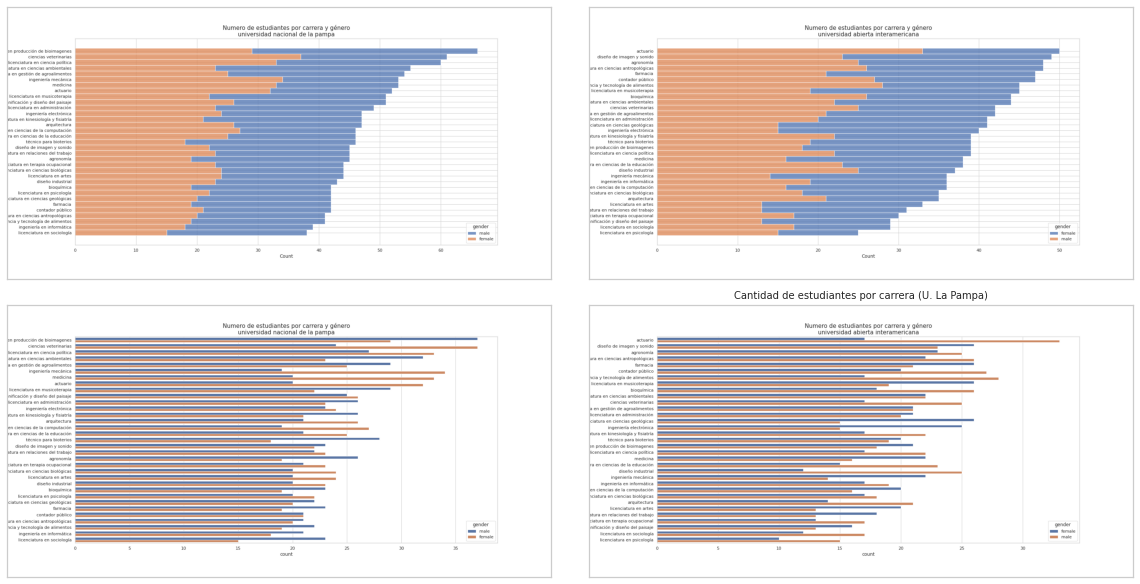

In [74]:
# numero de estudiantes por carrera

n = 2
m = 2
fig, axes = plt.subplots(n, m, figsize=(16, 8), constrained_layout=True)

# Use the axes for plotting
for i in range(0,n):
  for j in range(0,m):
    axes[i,j].grid(False)
    axes[i,j].set_xticks([])
    axes[i,j].set_yticks([])

axes[0,0].imshow(Image.open('p1_lp.png'))
axes[0,1].imshow(Image.open('p1_in.png'))
axes[1,0].imshow(Image.open('p2_lp.png'))
axes[1,1].imshow(Image.open('p2_in.png'))

#plt.title('Distribución de edad por carreras', fontsize=10)

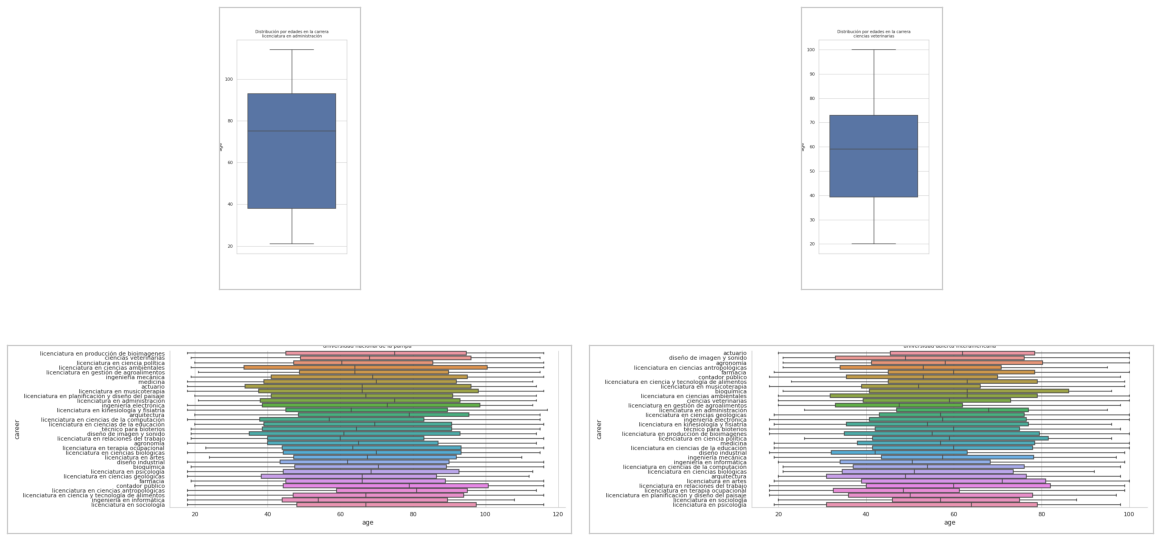

In [70]:
# distribucion por carrera y edad
n = 2
m = 2
fig, axes = plt.subplots(n, m, figsize=(16, 8), constrained_layout=True)

# Use the axes for plotting
for i in range(0,n):
  for j in range(0,m):
    axes[i,j].grid(False)
    axes[i,j].set_xticks([])
    axes[i,j].set_yticks([])

axes[0,0].imshow(Image.open('p3_lp.png'))
axes[0,1].imshow(Image.open('p3_in.png'))
axes[1,0].imshow(Image.open('p4_lp.png'))
axes[1,1].imshow(Image.open('p4_in.png'))

In [99]:
# hago mapa de calor de todo el dataset
# me quedo solo con las columnas de interes
stats_8 = pd.DataFrame(df_total, columns=['career', 'age', 'gender', 'location', 'university'])
# paso las variables a categoricas
stats_8['career']=stats_8['career'].astype('category').cat.codes
stats_8['gender']=stats_8['gender'].astype('category').cat.codes
stats_8['location']=stats_8['location'].astype('category').cat.codes
stats_8['university']=stats_8['university'].astype('category').cat.codes

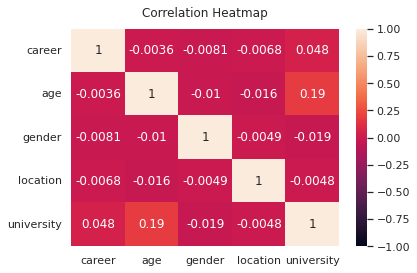

In [101]:
p10 = sns.heatmap(stats_8.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
p10.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Text(0.5, 1.0, 'Numero de estudiantes por carrera y universidad')

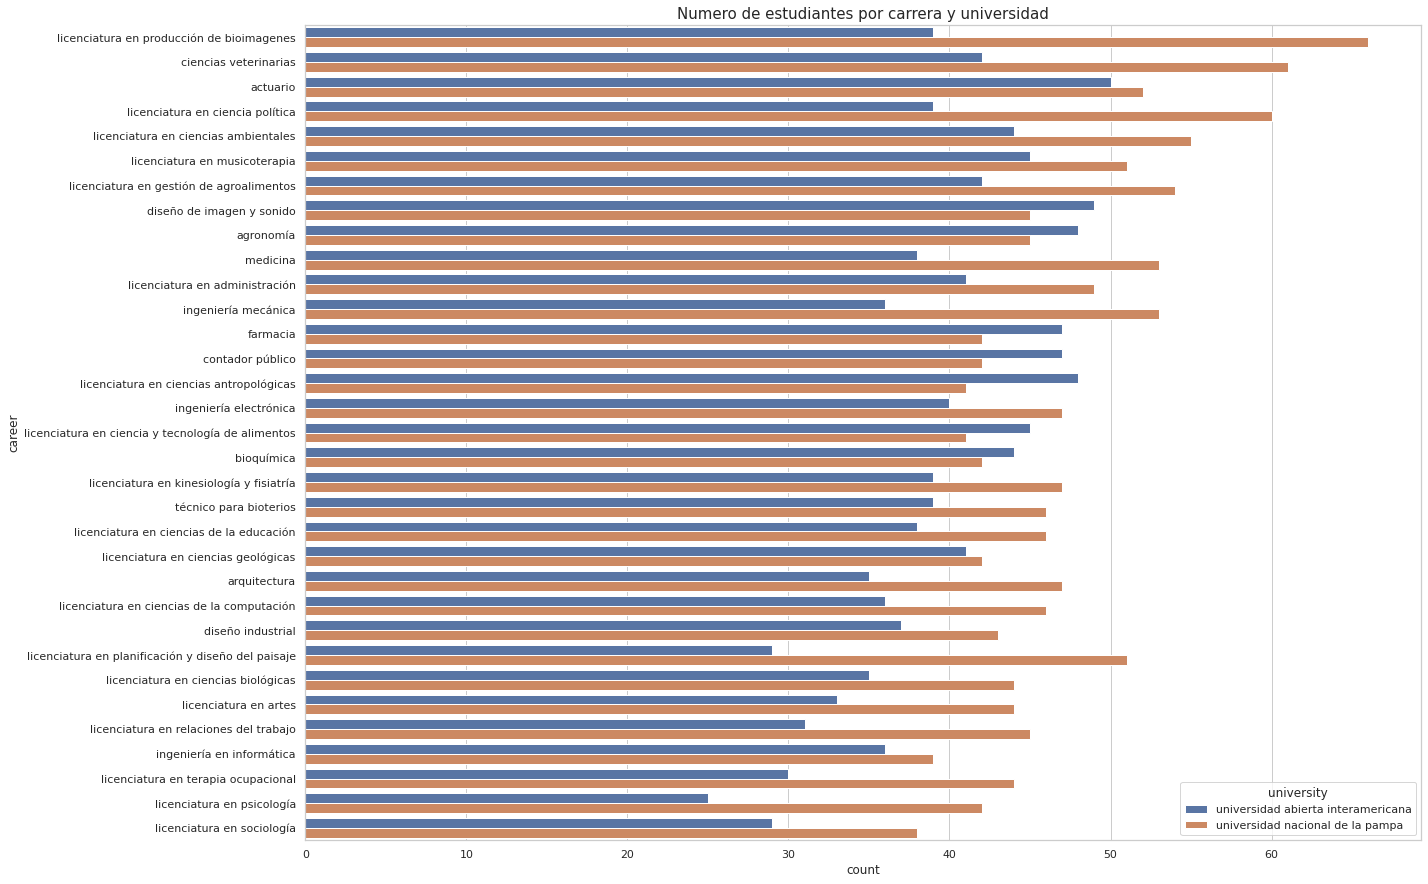

In [93]:
plt.figure(figsize=(20,15))
sns.countplot(data=stats_5, y="career", hue="university")
plt.title('Numero de estudiantes por carrera y universidad', fontsize=15)

**CONCLUSIONES**

En lo que respecta a la distribución de carreras entre las universidades de La Pampa y La Universidad Abierta Interamericana, existe bastante diferencia entre ambas universidades, pero en ambas se puede decir aproximadamente que la participación por género es muy similiar entre las carreras y las universidades.
La carrera con mayor participación en la Universidad de La Pampa es la Licenciatura en Producción de Bioimágenes (que ocupa el lugar 18 en la Universidad Interamericana). Mientras que la de mayor participación en la Interamericana es Actuario (que ocupa el octavo lugar en La Pampa).

En cuanto a distribución por edad, en La Pampa el promedio de la mediana de edad en las carreras, es de 65 años, mientras que en La Interamericana es de 55.

Si analizamos el número de estudiantes por localidad y por universidad, vemos que este número es muy bajo para todos los casos, siendo el más alto de 5 estudiantes para ambas universidades. Las localidades con el máximo número de estudiantes (5), en La Pampa son Agua Colorada, 9 de Julio y Arroyo Grande. Mientras que en la Interamericana, el máximo de 5 alumnos se da en las localidades de Villa Santos Tesei, Alto del Puesto y Glew. Se concluye que se da una mayor concentración en las localidades más cercanas a las universidades.

En cuanto a la distribución entre las universidades por fecha de inscripción, en ambas se ve una diferencia importante entre la cantidad de inscriptos entre 2020 y 2021. Esto se debe a que en el filtrado de datos desde la base de datos postgres, para 2020 se consideran 4 meses, mientras que para el 2021 solamente se consdiera los datos del mes de enero.

Finalmente si analizamos el mapa de calor entre ciertas variables, vemos que existe una importante correlación entre universidad y la edad, lo que ya se sugería en el análisis de los boxplot de distribución de edad. Esto se puede deber a las fechas de fundacíón: La Pampa en 1958, y la Interamericana en 1995, ya que en el dataset no se filtró por edad máxima, y por tanto se tiene el registro histórico de alumnos.
Otro aspecto que puede desprenderse del mapa de calor, es la correlación entre la distribución de las carreras por universidad, tal como se había comentado antes. Sin embargo, no se pudo identificar ningún patrón en las carreras (por ejemplo las de perfil científico y las de perfil administrativo) entre ambas universidades.
Finalmente del mapa de calor, a diferencia de lo que se esperaba, se puede ver una baja correlación entre localidad y universidad, aunque como se vio, es arriesgado tomar una conclusión respecto a este punto, dado los pocos datos con que se cuenta.